### Content

- Introduction
- Hypothesis Formulation
- Experimental Design
- Analysis and Visualization
- Conclusion

## Introduction
In this case study, we investigate the statistical significance of COVID-19 across the different regions in the world. Data has been collected on 10th May 2020 for the study from Johns Hopkins University.

## Hypothesis 
$H_0:$ There is no statistical difference in the mean of COVID-19 confirmed cases across the different regions.

$H_1:$ Atleast the means of COVID-19 confirmed cases of two regions are different from each other.

## Experimental Design

One-way ANOVA has been used because we have only one independent variable(i.e., region) and sample data from each region is independent from others. For our study, we consider 20 countries from each region. 
- Dependent Variable: number of confirmed cases 
- Independent Variable: region

In [1]:
import pandas as pd
import numpy as np

from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
df=pd.read_csv('data/covid19_preprocessed_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    80 non-null     object
 1   Confirmed  80 non-null     int64 
 2   Deaths     80 non-null     int64 
 3   Recovered  80 non-null     int64 
 4   Active     80 non-null     int64 
 5   Continent  80 non-null     object
 6   Region     80 non-null     object
dtypes: int64(4), object(3)
memory usage: 4.5+ KB


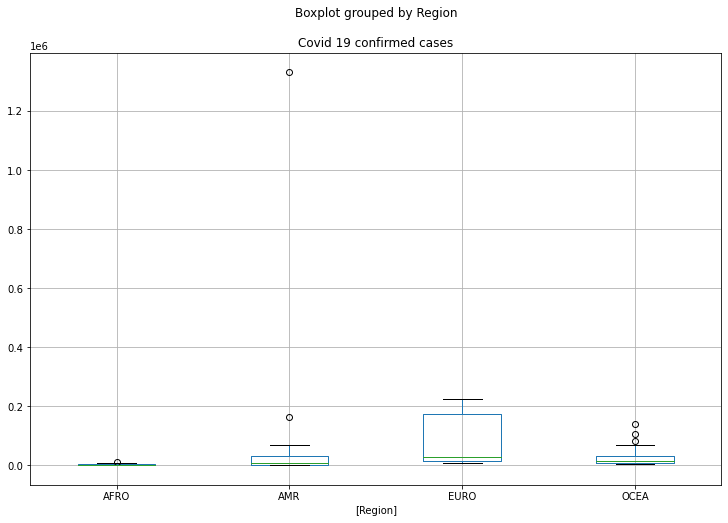

In [8]:
df.boxplot(column=['Confirmed'],by=['Region'],figsize=(12,8))
plt.title('Covid 19 confirmed cases')
plt.show()

Perform the log-transformation on data to reduces the outlier effects and bring the data close to the gaussian distribution.

### Log-transformation

In [9]:
df['Confirmed']=np.log(df['Confirmed'])

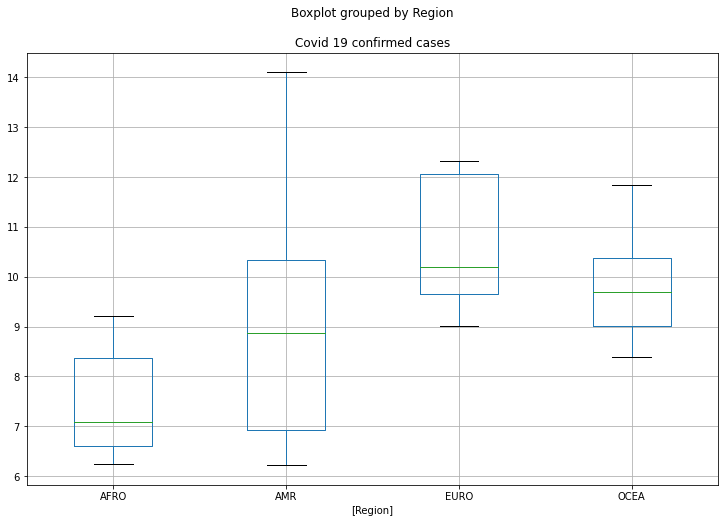

In [10]:
df.boxplot(column=['Confirmed'],by=['Region'],figsize=(12,8))
plt.title('Covid 19 confirmed cases')
plt.show()

Further, we can perform a statistical test for normality to make a robust conclusion about the log-transformed data.

### Normality check: Shapiro- Wilk test

In [11]:
df_group=df['Region'].unique()

In [13]:
df_group=list(df_group)

In [14]:
df_group

['AFRO', 'AMR', 'EURO', 'OCEA']

In [27]:
for i in df_group:
    group=df[df['Region']==i]['Confirmed']
    statistics,pvalue=stats.shapiro(group)
    print(i,round(statistics,2),round(pvalue,2))

AFRO 0.9 0.03
AMR 0.93 0.15
EURO 0.86 0.01
OCEA 0.94 0.3


Note: data is not normally distributed for regions AFRO and EURO since we reject the null hypothesis at a significant level alpha=0.05 as per the Shapiro-Wilk test.

### Residuals analysis: OLS methods

In [29]:
model=ols('Confirmed ~ C(Region)',df).fit()
model.summary(title='OLS Regression Model:log_confirmed ~Region')

<class 'statsmodels.iolib.summary.Summary'>
"""
                  OLS Regression Model:log_confirmed ~Region                  
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     17.82
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           7.42e-09
Time:                        17:53:00   Log-Likelihood:                -139.82
No. Observations:                  80   AIC:                             287.6
Df Residuals:                      76   BIC:                             297.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4605      0.319     23.407      0.000       6.826       8.095
C(Region)[T.AMR]      1.4589      0.451      3.237      0.002       0.561       2.357
C(Region)[T.EURO]     3.1287      0.451      6.941      0.000       2.231       4.026
C(Region)[T.OCEA]     2.3700      0.451      5.258      0.000       1.472       3.268
==============================================================================
Omnibus:                        9.755   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.887
Skew:                           0.701   Prob(JB):                      0.00713
Kurtosis:                       4.001   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'residuals')

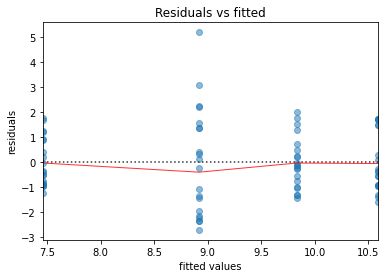

In [30]:
ax=sns.residplot(x=model.fittedvalues,
                y=model.resid,
                lowess=True,
                scatter_kws={'alpha':0.5},
                line_kws={'color':'red','lw':1,'alpha':0.8})
ax.set_title('Residuals vs fitted')
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')

 The residuals in the plot are evenly distributed in the lower and upper boundaries revealing normality condition. We will further prove the normality of residuals using Normal QQ-Plot, Normal PP-Plot and histogram.

In [31]:
model_norm_residuals = model.get_influence().resid_studentized_internal

In [32]:
df

,Country,Confirmed,Deaths,Recovered,Active,Continent,Region
0,South Africa,9.211839,194,4173,5648,Africa,AFRO
1,Egypt,9.148465,525,2075,6800,Africa,AFRO
2,Morocco,8.709960,188,2554,3321,Africa,AFRO
3,Algeria,8.652248,502,2678,2543,Africa,AFRO
4,Nigeria,8.389133,143,778,3478,Africa,AFRO
...,...,...,...,...,...,...,...
75,Australia,8.846209,97,6167,684,Oceania,OCEA
76,Malaysia,8.803274,108,5025,1523,Asia,OCEA
77,Kazakhstan,8.535033,31,1941,3118,Asia,OCEA
78,Bahrain,8.505323,8,2070,2863,Asia,OCEA


## QQ-plot
residuals to see whether it is normal and around the line

In [33]:
model_norm_residuals = model.get_influence().resid_studentized_internal

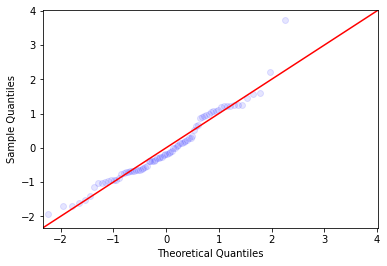

In [34]:
PP=ProbPlot(model_norm_residuals)
PP.qqplot(line='45',alpha=0.1,lw=1)
plt.show()


Note: All of the residuals lying on or close to the red line in both plots so we conclude that residuals is approximately normally distributed.

## ANOVA Table

In [35]:
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),3.0,108.638244,36.212748,17.823827,7.423019e-09
Residual,76.0,154.409535,2.031704,NaN,NaN


In [42]:
df

,Country,Confirmed,Deaths,Recovered,Active,Continent,Region
0,South Africa,9.211839,194,4173,5648,Africa,AFRO
1,Egypt,9.148465,525,2075,6800,Africa,AFRO
2,Morocco,8.709960,188,2554,3321,Africa,AFRO
3,Algeria,8.652248,502,2678,2543,Africa,AFRO
4,Nigeria,8.389133,143,778,3478,Africa,AFRO
...,...,...,...,...,...,...,...
75,Australia,8.846209,97,6167,684,Oceania,OCEA
76,Malaysia,8.803274,108,5025,1523,Asia,OCEA
77,Kazakhstan,8.535033,31,1941,3118,Asia,OCEA
78,Bahrain,8.505323,8,2070,2863,Asia,OCEA


## F-test ANOVA test

In [48]:
table=pd.pivot_table(df,values='Confirmed',index=df.index,columns=['Region'],aggfunc=np.sum)

In [52]:
F, p= stats.f_oneway(table['AFRO'].dropna(),table['AMR'].dropna(),table['EURO'].dropna(),table['OCEA'].dropna())
print('F-statistics=%.2f,p=%.2f' %(F,p))

F-statistics=17.82,p=0.00


Difference in number of cases among the regions is significant at alpha=0.05 so, we reject the null hypothesis in favour of alternative. However, we don’t know where the difference between regions is yet. So, we will do Post Hoc test to investigate further where the difference lies.

## Post Hoc Test: Tukey HSD

In [38]:
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(df['Confirmed'],df['Region'])
results=mc.tukeyhsd()

In [40]:
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  AFRO    AMR   1.4589 0.0095  0.2749  2.643   True
  AFRO   EURO   3.1287  0.001  1.9446 4.3127   True
  AFRO   OCEA     2.37  0.001  1.1859  3.554   True
   AMR   EURO   1.6698 0.0022  0.4857 2.8538   True
   AMR   OCEA   0.9111 0.1893  -0.273 2.0951  False
  EURO   OCEA  -0.7587 0.3399 -1.9427 0.4254  False
---------------------------------------------------


Note: The mean COVID-19 cases for AFRO region is statistically different from other regions AMR, EURO, and OCEA at 0.05% significance level. Also, mean COVID-19 cases for AMR-EURO regions is statistically different at 0.05% significance level. At 95% confidence level both AMR-OCEA and EURO-OCEA pair of regions are not significantly different.